# 1. Import libraries

In [254]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# 2. Import and read data

In [395]:
data = pd.read_excel("/Users/admin/Desktop/EDA/classification/CreditCard_Default_Prediction.xlsx")

In [396]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status1,Repayment_Status2,Repayment_Status3,Repayment_Status4,Repayment_Status5,Repayment_Status6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,Male,Graduate,Single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,Male,Graduate,Single,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,Female,University,Single,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,Female,High School,Married,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,Male,High School,Single,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


# 3. Data description

- Default: 0 = Not Default, 1 = Default

- ID: Cutomer ID

- LIMIT_BAL: Amount of the given credit 

- SEX: Male or Female

- EDUCATION: UNiversity, Graduate, HighSchool, others

- Marriage: Single, married, others

- AGE: Age in years

- Repayment_Statusx: History of past six months repayment status
 -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

- Bill_AmtX: Amount of bill statement for past six months

- Pay_AmtX: Amount of previous payment



# 4. Exploratory Data Analysis (EDA)


## 4.1 Data types, missing data and summary statistics

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 30000 non-null  int64 
 1   LIMIT_BAL          30000 non-null  int64 
 2   SEX                30000 non-null  object
 3   EDUCATION          30000 non-null  object
 4   MARRIAGE           30000 non-null  object
 5   AGE                30000 non-null  int64 
 6   Repayment_Status1  30000 non-null  int64 
 7   Repayment_Status2  30000 non-null  int64 
 8   Repayment_Status3  30000 non-null  int64 
 9   Repayment_Status4  30000 non-null  int64 
 10  Repayment_Status5  30000 non-null  int64 
 11  Repayment_Status6  30000 non-null  int64 
 12  BILL_AMT1          30000 non-null  int64 
 13  BILL_AMT2          30000 non-null  int64 
 14  BILL_AMT3          30000 non-null  int64 
 15  BILL_AMT4          30000 non-null  int64 
 16  BILL_AMT5          30000 non-null  int64

In [258]:
#summary of feature statistics
data.describe()

,ID,LIMIT_BAL,AGE,Repayment_Status1,Repayment_Status2,Repayment_Status3,Repayment_Status4,Repayment_Status5,Repayment_Status6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [259]:
# Missing data 

data.isnull().sum().sort_values(ascending = False)

ID                   0
BILL_AMT2            0
PAY_AMT6             0
PAY_AMT5             0
PAY_AMT4             0
PAY_AMT3             0
PAY_AMT2             0
PAY_AMT1             0
BILL_AMT6            0
BILL_AMT5            0
BILL_AMT4            0
BILL_AMT3            0
BILL_AMT1            0
LIMIT_BAL            0
Repayment_Status6    0
Repayment_Status5    0
Repayment_Status4    0
Repayment_Status3    0
Repayment_Status2    0
Repayment_Status1    0
AGE                  0
MARRIAGE             0
EDUCATION            0
SEX                  0
Default              0
dtype: int64

In [260]:
# checking duplicates
#no duplicates
data[data.duplicated(['ID'], keep=False)]


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status1,Repayment_Status2,Repayment_Status3,Repayment_Status4,Repayment_Status5,Repayment_Status6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default


In [261]:
# number of unique values in individual feature
data.nunique()

ID                   30000
LIMIT_BAL               81
SEX                      2
EDUCATION                7
MARRIAGE                 4
AGE                     56
Repayment_Status1       11
Repayment_Status2       11
Repayment_Status3       11
Repayment_Status4       11
Repayment_Status5       10
Repayment_Status6       10
BILL_AMT1            22723
BILL_AMT2            22346
BILL_AMT3            22026
BILL_AMT4            21548
BILL_AMT5            21010
BILL_AMT6            20604
PAY_AMT1              7943
PAY_AMT2              7899
PAY_AMT3              7518
PAY_AMT4              6937
PAY_AMT5              6897
PAY_AMT6              6939
Default                  2
dtype: int64

In [262]:
# list of unique labels in each feature
print(data['SEX'].unique())
print(data['EDUCATION'].unique())
print(data['MARRIAGE'].unique())
print(data['AGE'].unique())
print(data['Default'].unique())
print(data['Repayment_Status1'].unique())
print(data['Repayment_Status2'].unique())
print(data['Repayment_Status3'].unique())
print(data['Repayment_Status4'].unique())
print(data['Repayment_Status5'].unique())
print(data['Repayment_Status6'].unique())


['Female' 'Male']
['University' 'Graduate' 'High School' 5 'Others' 6 0]
['Married' 'Single' 'Others' 0]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
[1 0]
[ 2 -1  0 -2  1  3  4  8  7  5  6]
[ 2  0 -1 -2  3  5  7  4  1  6  8]
[-1  0  2 -2  3  4  6  7  1  5  8]
[-1  0 -2  2  3  4  5  7  6  1  8]
[-2  0 -1  2  3  5  4  7  8  6]
[-2  2  0 -1  3  6  4  7  8  5]


## 4.2 Feature analysis
## 4.2.1 Categorical variables


Categorical variables in our dataset are gender, Education and Marriage.

# Categorical: gender

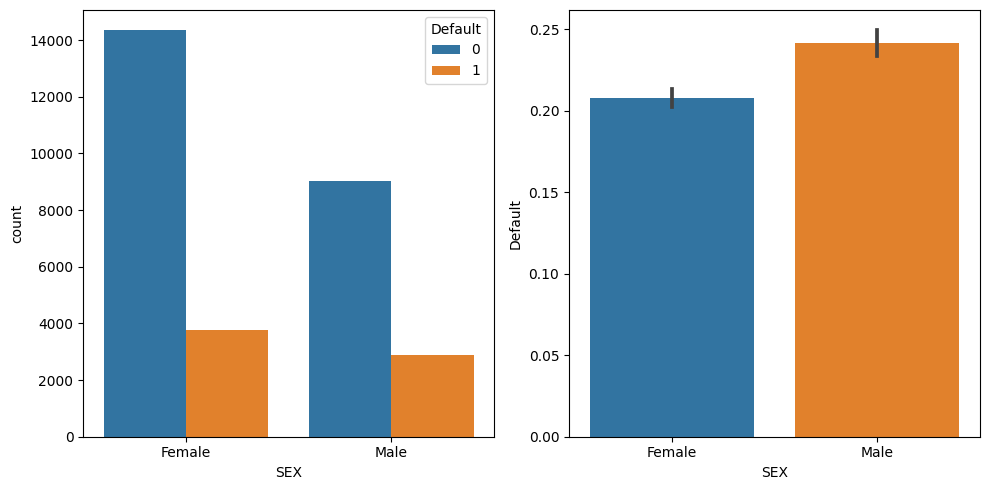

In [263]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(ax=axes[0], data=data, x='SEX', hue = 'Default')
sns.barplot(ax=axes[1], data=data, x='SEX', y='Default')
plt.show()


In [264]:
# female samples are larger than male samples
# non default female counts are higher than male non defaulters
# male default probability is higher than female default probability

In [265]:
print(data['SEX'].value_counts(dropna = False))

data[['SEX', 'Default']].groupby(['SEX'], as_index = False).mean().sort_values(by = 'Default', ascending = False)


Female    18112
Male      11888
Name: SEX, dtype: int64


,SEX,Default
1,Male,0.241672
0,Female,0.207763


# Categorical : Education

In [266]:
# considering University as "Undergrad", graduate as "postgrad" and others" as highly educated and put it under "postgrad"
data['EDUCATION'] = data['EDUCATION'].replace({'University' : 'Undergrad', 'Graduate' : 'Postgrad',5:'Others',6:'Others',0:'Others'})       

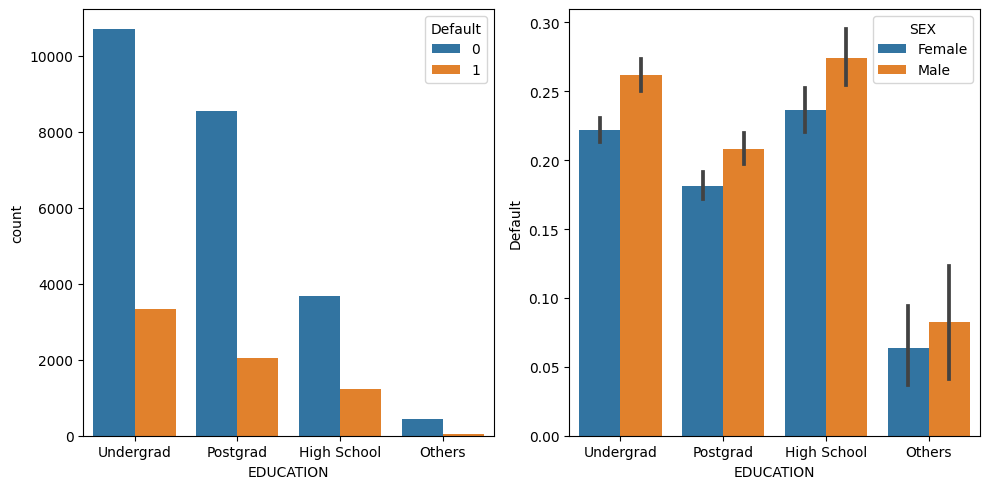

In [267]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(ax=axes[0], data=data, x='EDUCATION', hue = 'Default')
sns.barplot(ax=axes[1], data=data, x='EDUCATION', y='Default', hue='SEX')
plt.show()


In [268]:
# undergrad and postgrad  samples are larger than high school samples
# default probability for male category is higher than female in all education level
# high school followed by undergrad default probability is higher than postgrad and others(higher education such as phd)default probability


In [269]:
print(data['EDUCATION'].value_counts(dropna = False))

data[['EDUCATION', 'Default']].groupby(['EDUCATION'], as_index = False).mean().sort_values(by = 'Default', ascending = False)

Undergrad      14030
Postgrad       10585
High School     4917
Others           468
Name: EDUCATION, dtype: int64


,EDUCATION,Default
0,High School,0.251576
3,Undergrad,0.237349
2,Postgrad,0.192348
1,Others,0.070513


In [270]:
edu = data[['EDUCATION', 'LIMIT_BAL']].groupby(['EDUCATION'], as_index = False).mean().sort_values(by = 'LIMIT_BAL', ascending = False)
edu

,EDUCATION,LIMIT_BAL
2,Postgrad,212956.069910
1,Others,181316.239316
3,Undergrad,147062.437634
0,High School,126550.270490


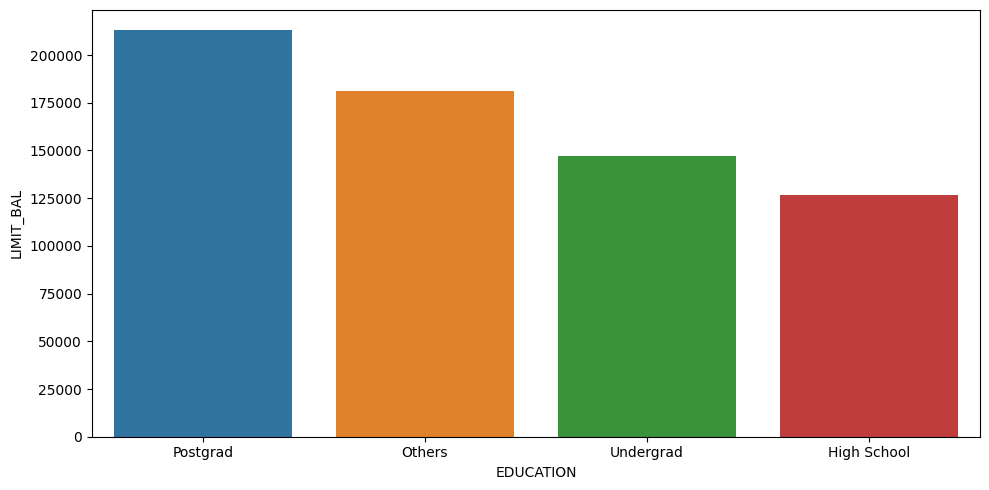

In [271]:
# credit limit based on education
sns.barplot(data=edu, x='EDUCATION', y='LIMIT_BAL')
plt.show()

In [272]:
# post graduate followed by higher education has high credit limit

# Categorical: Marriage status

In [273]:
# replacing "0" with "others" category
data['MARRIAGE'] = data['MARRIAGE'].replace({0 : 'Others'})


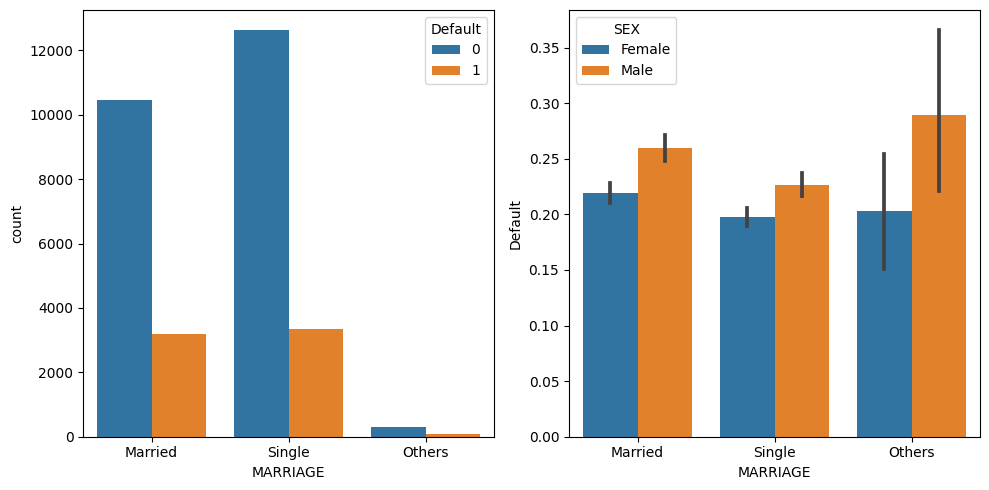

In [274]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(ax=axes[0], data=data, x='MARRIAGE', hue = 'Default')
sns.barplot(ax=axes[1], data=data, x='MARRIAGE', y='Default', hue='SEX')
plt.show()


In [275]:
# married and single samples are larger than others(divorced) samples
# default probability for male category is higher than female in all marriage status level
# others (divorced) followed by married category default probability is higher than single default probability


In [276]:
print(data['MARRIAGE'].value_counts(dropna = False))

data[['MARRIAGE', 'Default']].groupby(['MARRIAGE'], as_index = False).mean().sort_values(by = 'Default', ascending = False)


Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64


,MARRIAGE,Default
1,Others,0.236074
0,Married,0.234717
2,Single,0.209283


# Numerical : Age

In [277]:
np.sort((data['AGE'].unique()))

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 79])

Text(0.5, 1.0, 'Credit card holder Age Distribution')

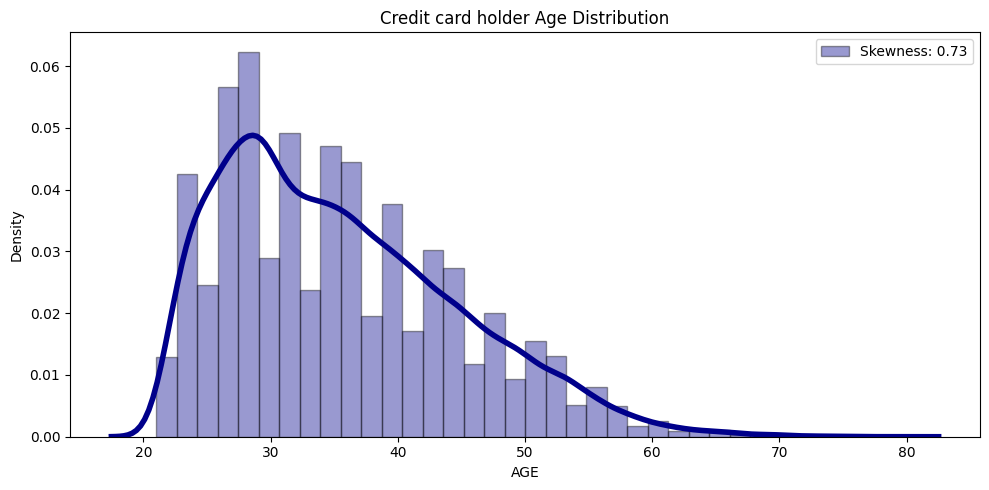

In [278]:
# Density Plot and Histogram of Credit card holder Age
sns.distplot(data['AGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label = 'Skewness: %.2f'%(data['AGE'].skew()))
plt.legend(loc = 'best')
plt.title('Credit card holder Age Distribution')

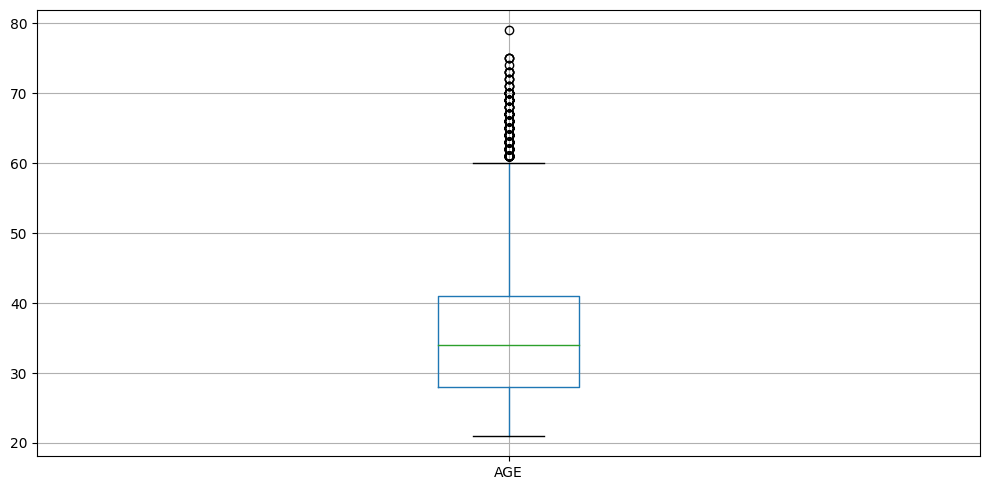

In [279]:
stud_bplt = data.boxplot(column = ['AGE'])
stud_bplt.plot()
plt.show()

In [280]:
# discretization of AGE
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

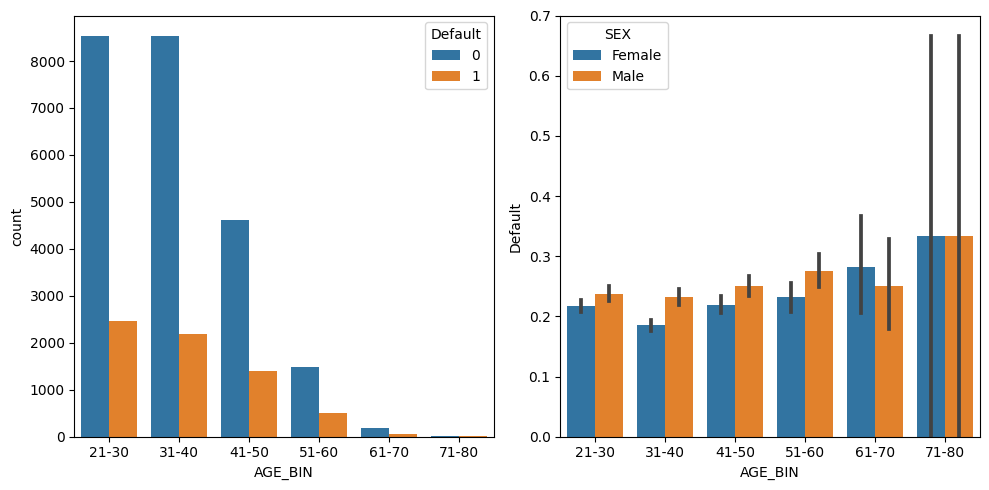

In [281]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(ax=axes[0], data=data, x='AGE_BIN', hue = 'Default')
sns.barplot(ax=axes[1], data=data, x='AGE_BIN', y='Default', hue='SEX')
plt.show()


In [282]:
# 21 to 60 age samples are larger than age greater than 50 samples
# default probability age from 21 to 60 for male category is higher than female category
# age 61-70 default probability is higher in female category
# age 71-80 default probability is same for male and female


In [283]:
print(data['AGE_BIN'].value_counts(dropna = False))

data[['AGE_BIN', 'Default']].groupby(['AGE_BIN'], as_index = False).mean().sort_values(by = 'Default', ascending = False)


21-30    11013
31-40    10713
41-50     6005
51-60     1997
61-70      257
71-80       15
Name: AGE_BIN, dtype: int64


,AGE_BIN,Default
5,71-80,0.333333
4,61-70,0.264591
3,51-60,0.252379
2,41-50,0.232973
0,21-30,0.224371
1,31-40,0.204331


Text(0.5, 1.0, 'Credit card holder Age Distribution by Default')

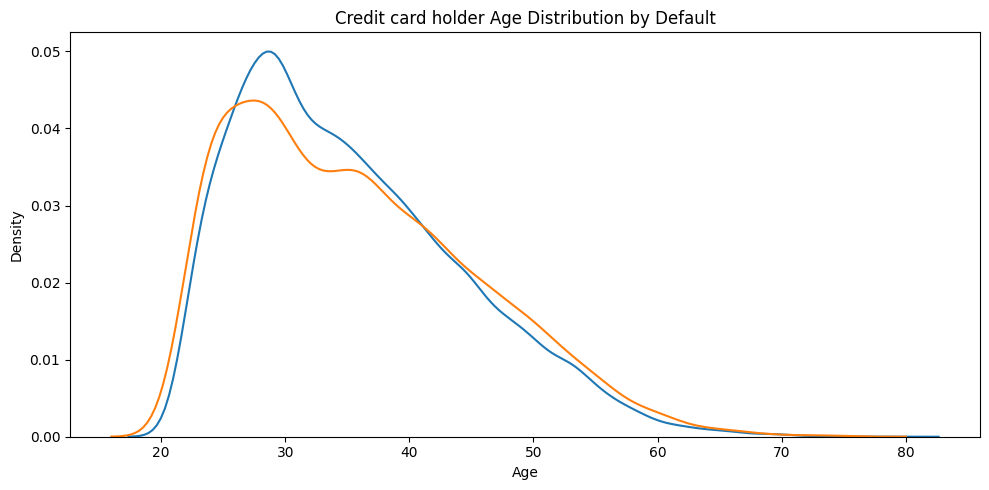

In [284]:
sns.kdeplot(data['AGE'][data['Default'] == 0], label = 'not Default')
sns.kdeplot(data['AGE'][data['Default'] == 1], label = 'Default')
plt.xlabel('Age')
plt.title('Credit card holder Age Distribution by Default')

In [285]:
#skew check
data.skew().sort_values(ascending=False)

PAY_AMT2             30.453817
PAY_AMT3             17.216635
PAY_AMT1             14.668364
PAY_AMT4             12.904985
PAY_AMT5             11.127417
PAY_AMT6             10.640727
BILL_AMT3             3.087830
BILL_AMT5             2.876380
BILL_AMT6             2.846645
BILL_AMT4             2.821965
BILL_AMT2             2.705221
BILL_AMT1             2.663861
Default               1.343504
Repayment_Status5     1.008197
Repayment_Status4     0.999629
LIMIT_BAL             0.992867
Repayment_Status6     0.948029
Repayment_Status3     0.840682
Repayment_Status2     0.790565
AGE                   0.732246
Repayment_Status1     0.731975
ID                    0.000000
dtype: float64

In [286]:
# right skewed: mean is on right of median

# Numerical : credit limit

In [287]:
np.sort((data['LIMIT_BAL'].unique()))

array([  10000,   16000,   20000,   30000,   40000,   50000,   60000,
         70000,   80000,   90000,  100000,  110000,  120000,  130000,
        140000,  150000,  160000,  170000,  180000,  190000,  200000,
        210000,  220000,  230000,  240000,  250000,  260000,  270000,
        280000,  290000,  300000,  310000,  320000,  327680,  330000,
        340000,  350000,  360000,  370000,  380000,  390000,  400000,
        410000,  420000,  430000,  440000,  450000,  460000,  470000,
        480000,  490000,  500000,  510000,  520000,  530000,  540000,
        550000,  560000,  570000,  580000,  590000,  600000,  610000,
        620000,  630000,  640000,  650000,  660000,  670000,  680000,
        690000,  700000,  710000,  720000,  730000,  740000,  750000,
        760000,  780000,  800000, 1000000])

Text(0.5, 1.0, 'Credit limit Distribution')

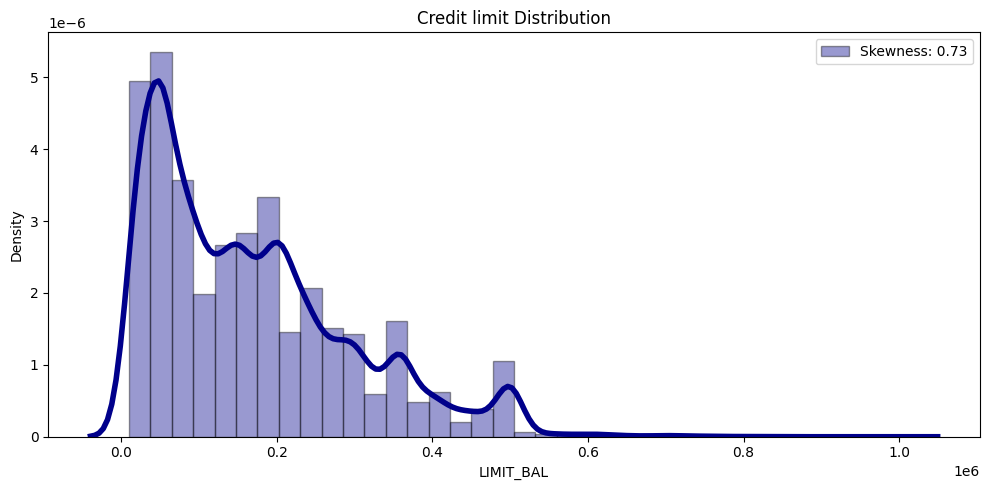

In [288]:
# Density Plot and Histogram of Credit limit
sns.distplot(data['LIMIT_BAL'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label = 'Skewness: %.2f'%(data['AGE'].skew()))
plt.legend(loc = 'best')
plt.title('Credit limit Distribution')

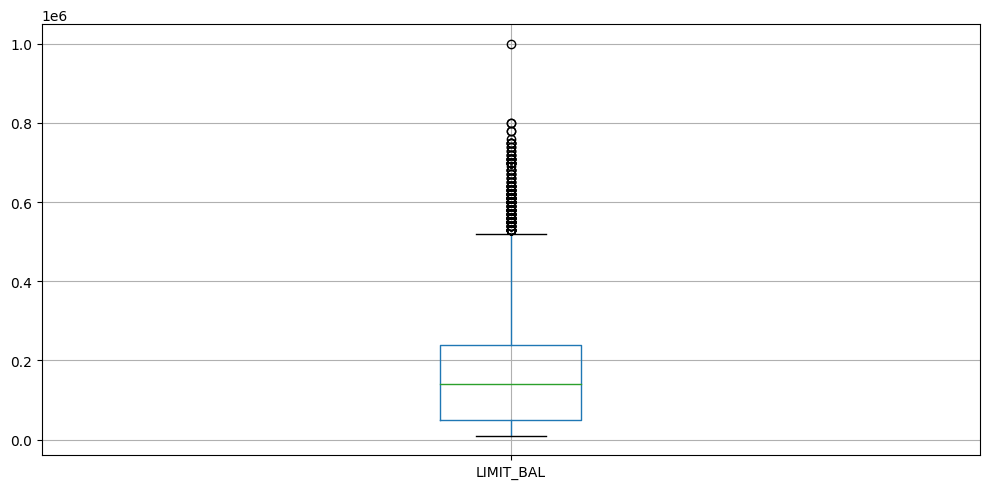

In [289]:
stud_bplt = data.boxplot(column = ['LIMIT_BAL'])
stud_bplt.plot()
plt.show()

In [290]:

# The observations from other columns indicate that this was just a customer who has an excellent payment history

outliers = data.loc[data['LIMIT_BAL']>900000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status1,Repayment_Status2,Repayment_Status3,Repayment_Status4,Repayment_Status5,Repayment_Status6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGE_BIN
2197,2198,1000000,Female,Postgrad,Married,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0,41-50


In [291]:
#discretization of credit limit
bins = [10000,20000,40000,60000,80000,100000,200000,300000,400000,500000,600000,1000000]
names = ['10000-20000','20001-40000','40001-60000','60001-80000','80001-100000','100001-200000','200001-300000','300001-400000','400001-500000','500001-600000','600001-1000000']
data['LIMIT_BAL_BIN'] = pd.cut(x=data.LIMIT_BAL, bins=bins, labels=names, right=True)

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 30000 non-null  int64   
 1   LIMIT_BAL          30000 non-null  int64   
 2   SEX                30000 non-null  object  
 3   EDUCATION          30000 non-null  object  
 4   MARRIAGE           30000 non-null  object  
 5   AGE                30000 non-null  int64   
 6   Repayment_Status1  30000 non-null  int64   
 7   Repayment_Status2  30000 non-null  int64   
 8   Repayment_Status3  30000 non-null  int64   
 9   Repayment_Status4  30000 non-null  int64   
 10  Repayment_Status5  30000 non-null  int64   
 11  Repayment_Status6  30000 non-null  int64   
 12  BILL_AMT1          30000 non-null  int64   
 13  BILL_AMT2          30000 non-null  int64   
 14  BILL_AMT3          30000 non-null  int64   
 15  BILL_AMT4          30000 non-null  int64   
 16  BILL

Text(0.5, 1.0, 'Default Probability by credit limit')

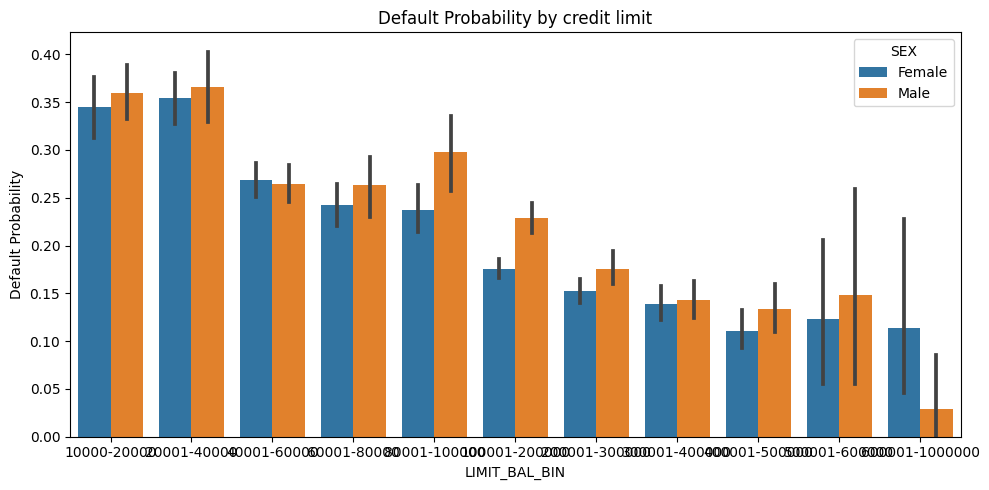

In [293]:
sns.barplot(x = 'LIMIT_BAL_BIN', y ='Default', hue = 'SEX', data = data)
plt.ylabel('Default Probability')
plt.title('Default Probability by credit limit')



In [294]:
#higher the credit limit lower the default probabability

# Outlier Removal

In [295]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value >= n)
    return multiple_outliers

outliers_to_drop = detect_outliers(data, 2, ['AGE','LIMIT_BAL'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 3 indices:  [1992, 6912, 21381]


In [296]:
# Outliers in numerical variables

data.loc[outliers_to_drop, :]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status1,Repayment_Status2,Repayment_Status3,Repayment_Status4,Repayment_Status5,Repayment_Status6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGE_BIN,LIMIT_BAL_BIN
1992,1993,580000,Male,High School,Married,67,2,2,3,3,4,6,453985,470915,471175,486776,503914,527711,25704,9464,25065,25703,33000,215,0,61-70,500001-600000
6912,6913,590000,Male,Postgrad,Married,63,0,0,0,-1,0,0,630458,646770,693131,324522,358774,369685,28000,61115,325000,40000,20000,51000,0,61-70,500001-600000
21381,21382,680000,Male,Undergrad,Single,64,0,0,0,0,0,0,568532,577681,577015,565669,524315,476846,22000,23000,21300,20000,17500,17000,0,61-70,600001-1000000


In [297]:
# Drop outliers and reset index

print("Before: {} rows".format(len(data)))
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(data)))

Before: 30000 rows
After: 29997 rows


# Numerical: Repayment status

<AxesSubplot: xlabel='Repayment_Status6', ylabel='count'>

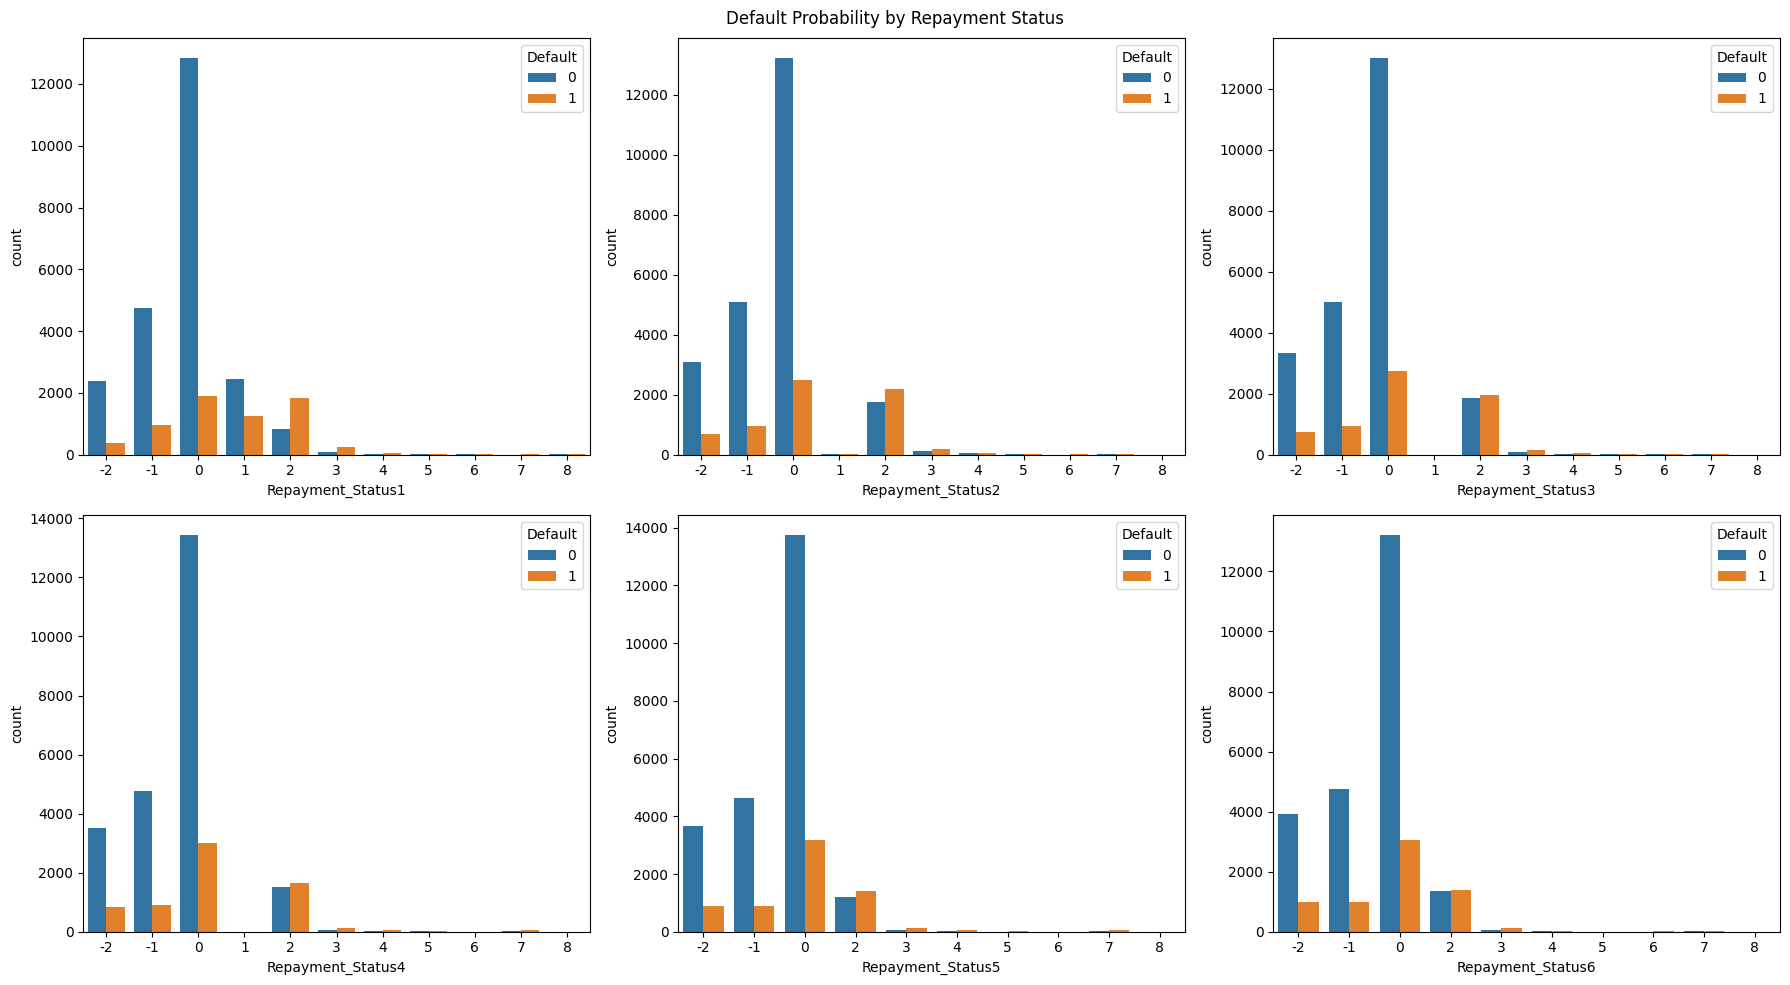

In [298]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Default Probability by Repayment Status')
sns.countplot(ax=axes[0, 0], data=data, x='Repayment_Status1',hue='Default')
sns.countplot(ax=axes[0, 1], data=data, x='Repayment_Status2',hue='Default')
sns.countplot(ax=axes[0, 2], data=data, x='Repayment_Status3',hue='Default')
sns.countplot(ax=axes[1, 0], data=data, x='Repayment_Status4', hue='Default')
sns.countplot(ax=axes[1, 1], data=data, x='Repayment_Status5', hue='Default')
sns.countplot(ax=axes[1, 2], data=data, x='Repayment_Status6', hue='Default')


In [299]:
#consumers who delay payment by one month or less have fewer credit card defaults and almost never happen. In the three months of May, August, and September, for consumers who delayed payment for more than 2 months, the greater the probability of their credit card default is, the more likely it is to increase the loan risk of financial institutions. For the feature series BillAMT and PayAMT, we also perform the corresponding analysis and draw a line graph to visualize the two features, as shown in Figures 8 and 9.


<AxesSubplot: xlabel='Repayment_Status6', ylabel='Default'>

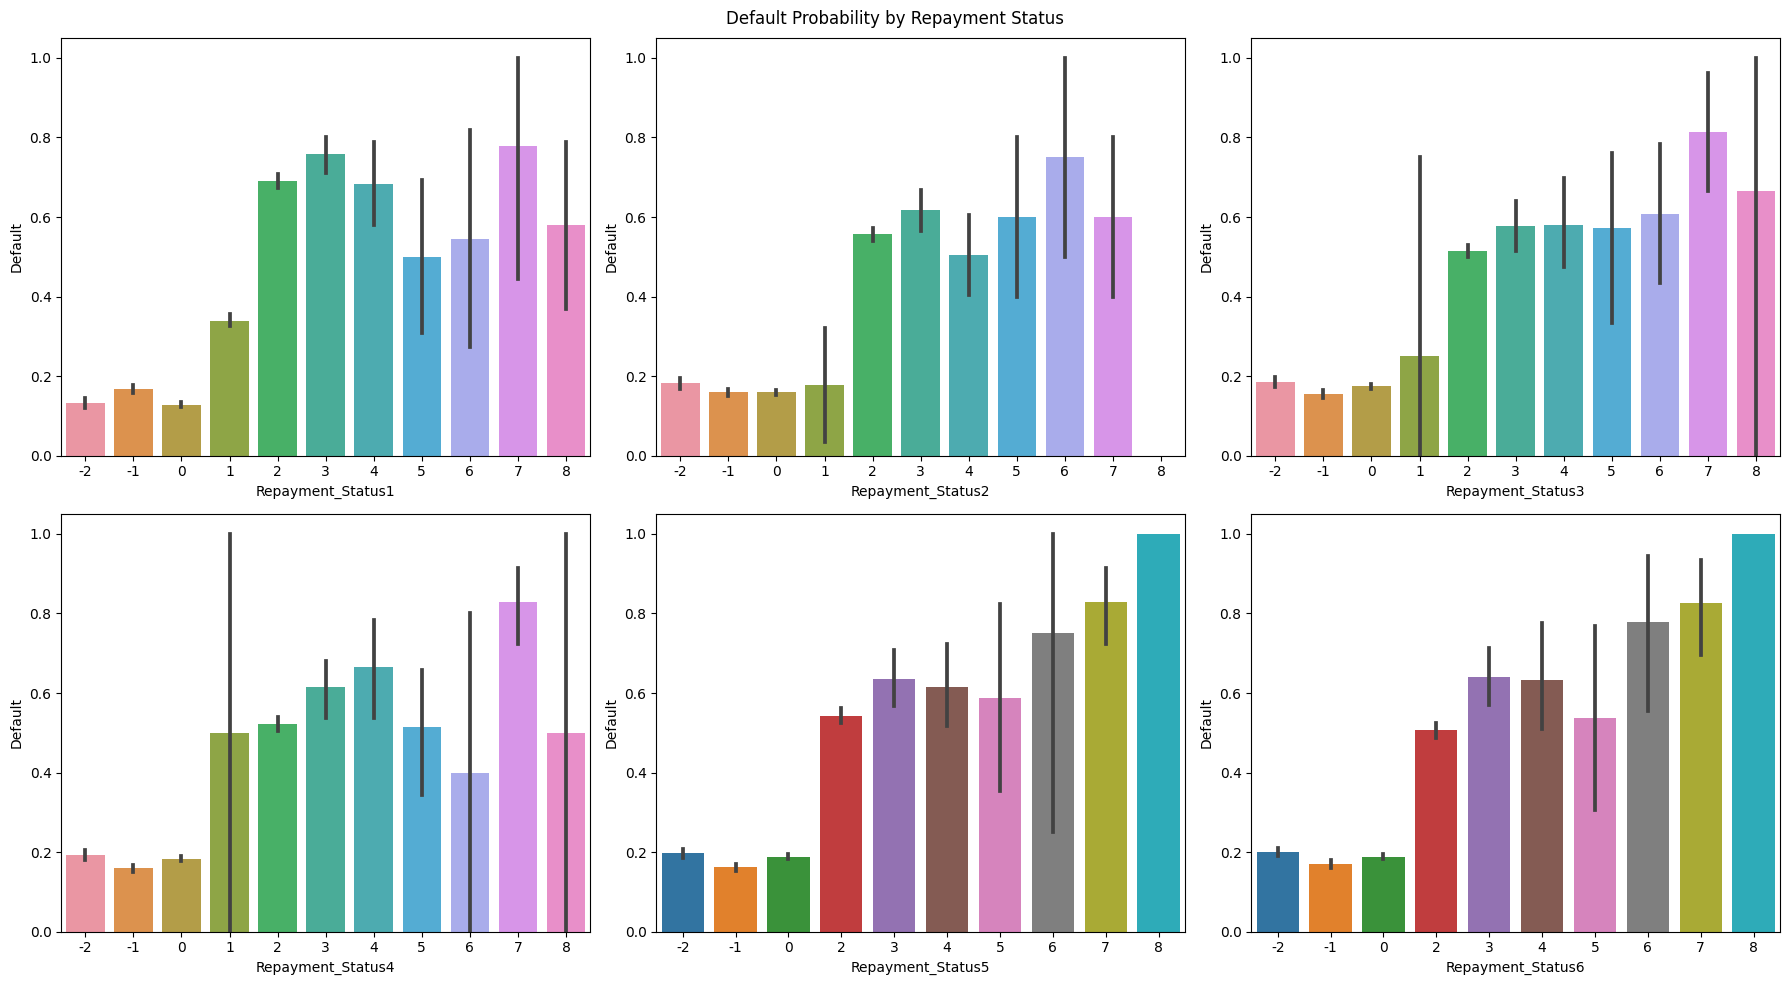

In [300]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Default Probability by Repayment Status')
sns.barplot(ax=axes[0, 0], data=data, x='Repayment_Status1', y='Default')
sns.barplot(ax=axes[0, 1], data=data, x='Repayment_Status2', y='Default')
sns.barplot(ax=axes[0, 2], data=data, x='Repayment_Status3', y='Default')
sns.barplot(ax=axes[1, 0], data=data, x='Repayment_Status4', y='Default')
sns.barplot(ax=axes[1, 1], data=data, x='Repayment_Status5', y='Default')
sns.barplot(ax=axes[1, 2], data=data, x='Repayment_Status6', y='Default')


In [301]:
## delayed payment leads higher default probabability

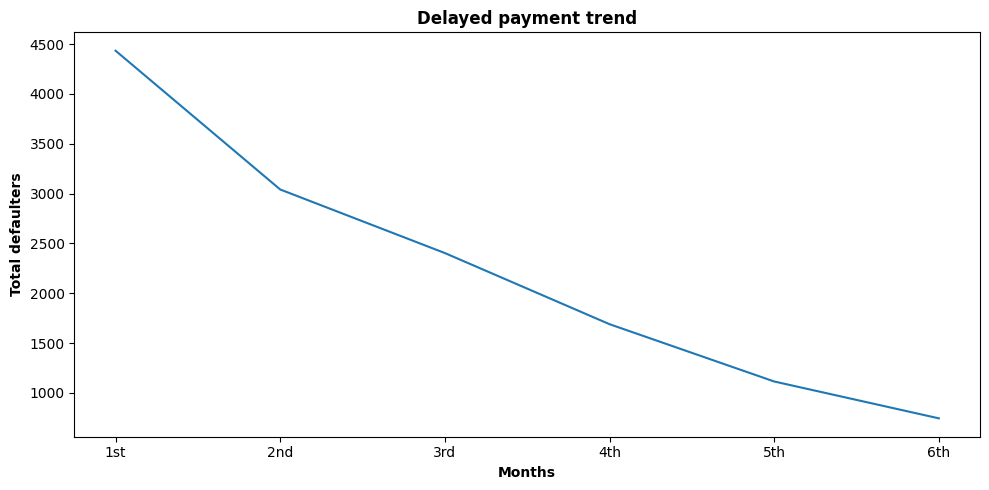

In [302]:
# Subset a dataframe with the records that have default

has_default = data[data['Default']== 1]
default_trend = has_default[['Repayment_Status1','Repayment_Status2','Repayment_Status3','Repayment_Status4','Repayment_Status5','Repayment_Status6']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['Repayment_Status1','Repayment_Status2','Repayment_Status3','Repayment_Status4','Repayment_Status5','Repayment_Status6'],['1st','2nd','3rd','4th','5th','6th'])

plt.xlabel('Months',fontweight='bold')
plt.ylabel('Total defaulters',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

<AxesSubplot: xlabel='Repayment_Status6', ylabel='BILL_AMT6'>

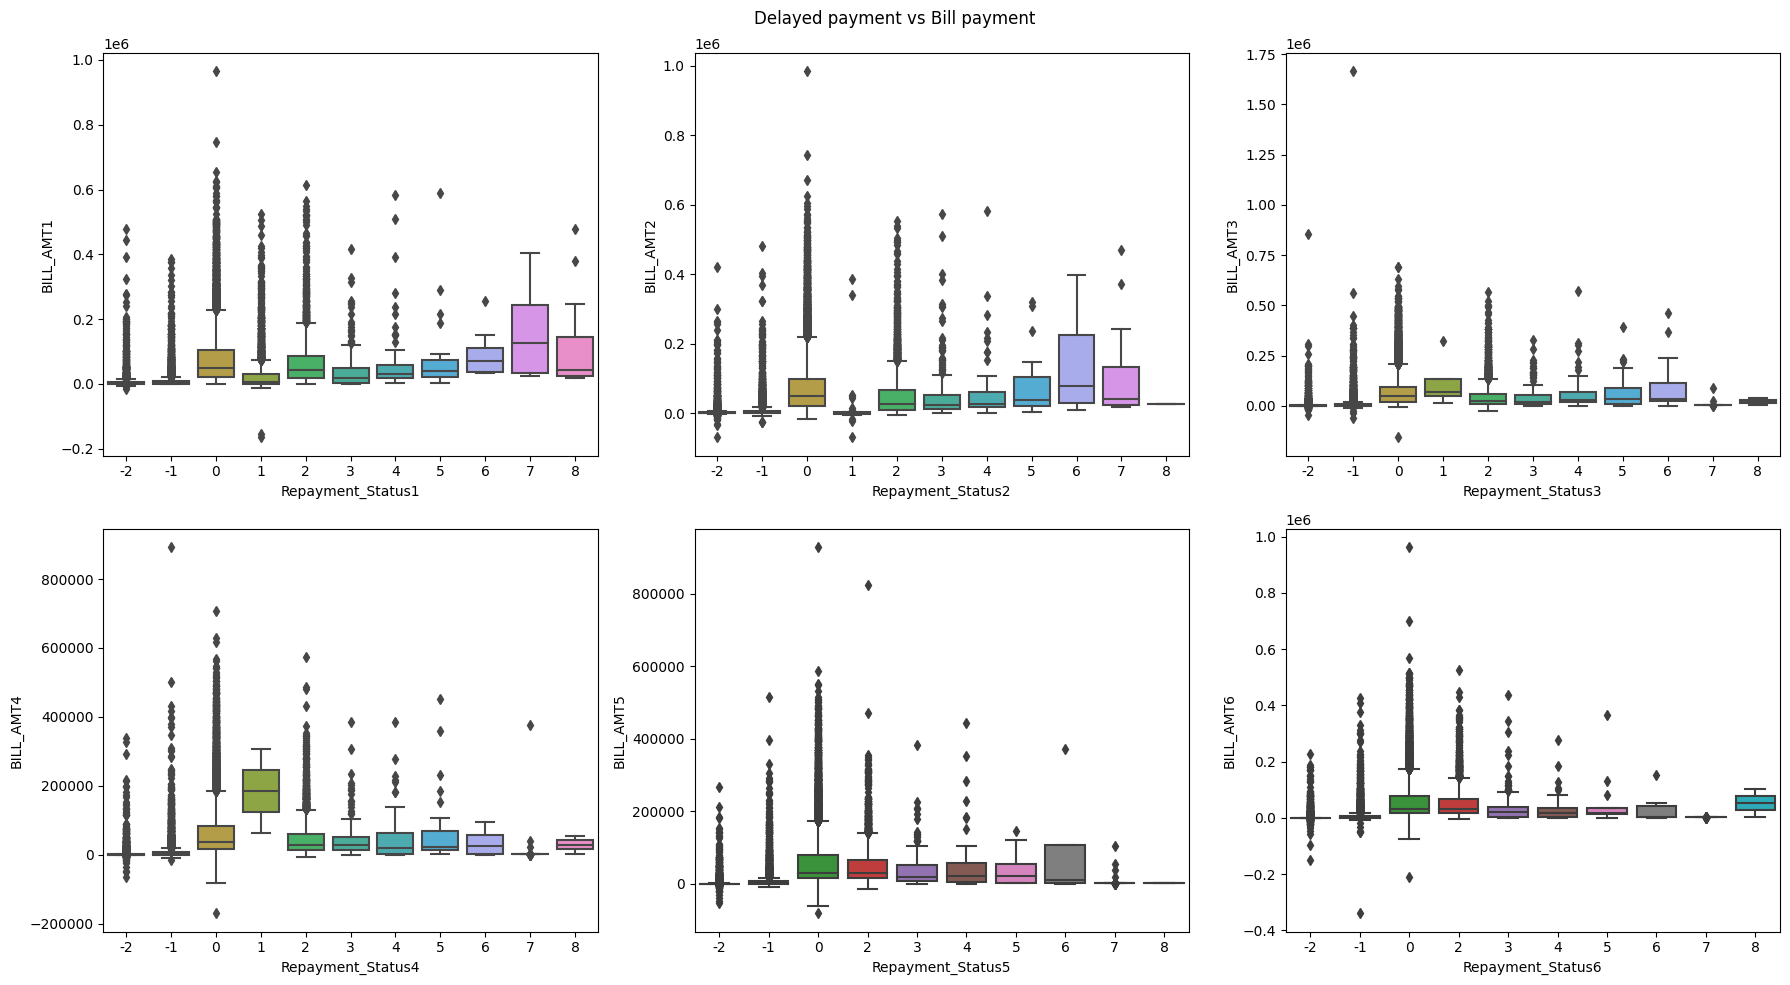

In [303]:
# Delayed payment vs Bill payment')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Delayed payment vs Bill payment')
sns.boxplot(ax=axes[0, 0],data=data,x='Repayment_Status1', y='BILL_AMT1')
sns.boxplot(ax=axes[0, 1],data=data,x='Repayment_Status2', y='BILL_AMT2')
sns.boxplot(ax=axes[0, 2],data=data,x='Repayment_Status3', y='BILL_AMT3')
sns.boxplot(ax=axes[1, 0],data=data,x='Repayment_Status4', y='BILL_AMT4')
sns.boxplot(ax=axes[1, 1],data=data,x='Repayment_Status5', y='BILL_AMT5')
sns.boxplot(ax=axes[1, 2],data=data,x='Repayment_Status6', y='BILL_AMT6')


In [304]:
# negative bill amount is due to credit from previous months

<AxesSubplot: xlabel='PAY_AMT6', ylabel='BILL_AMT6'>

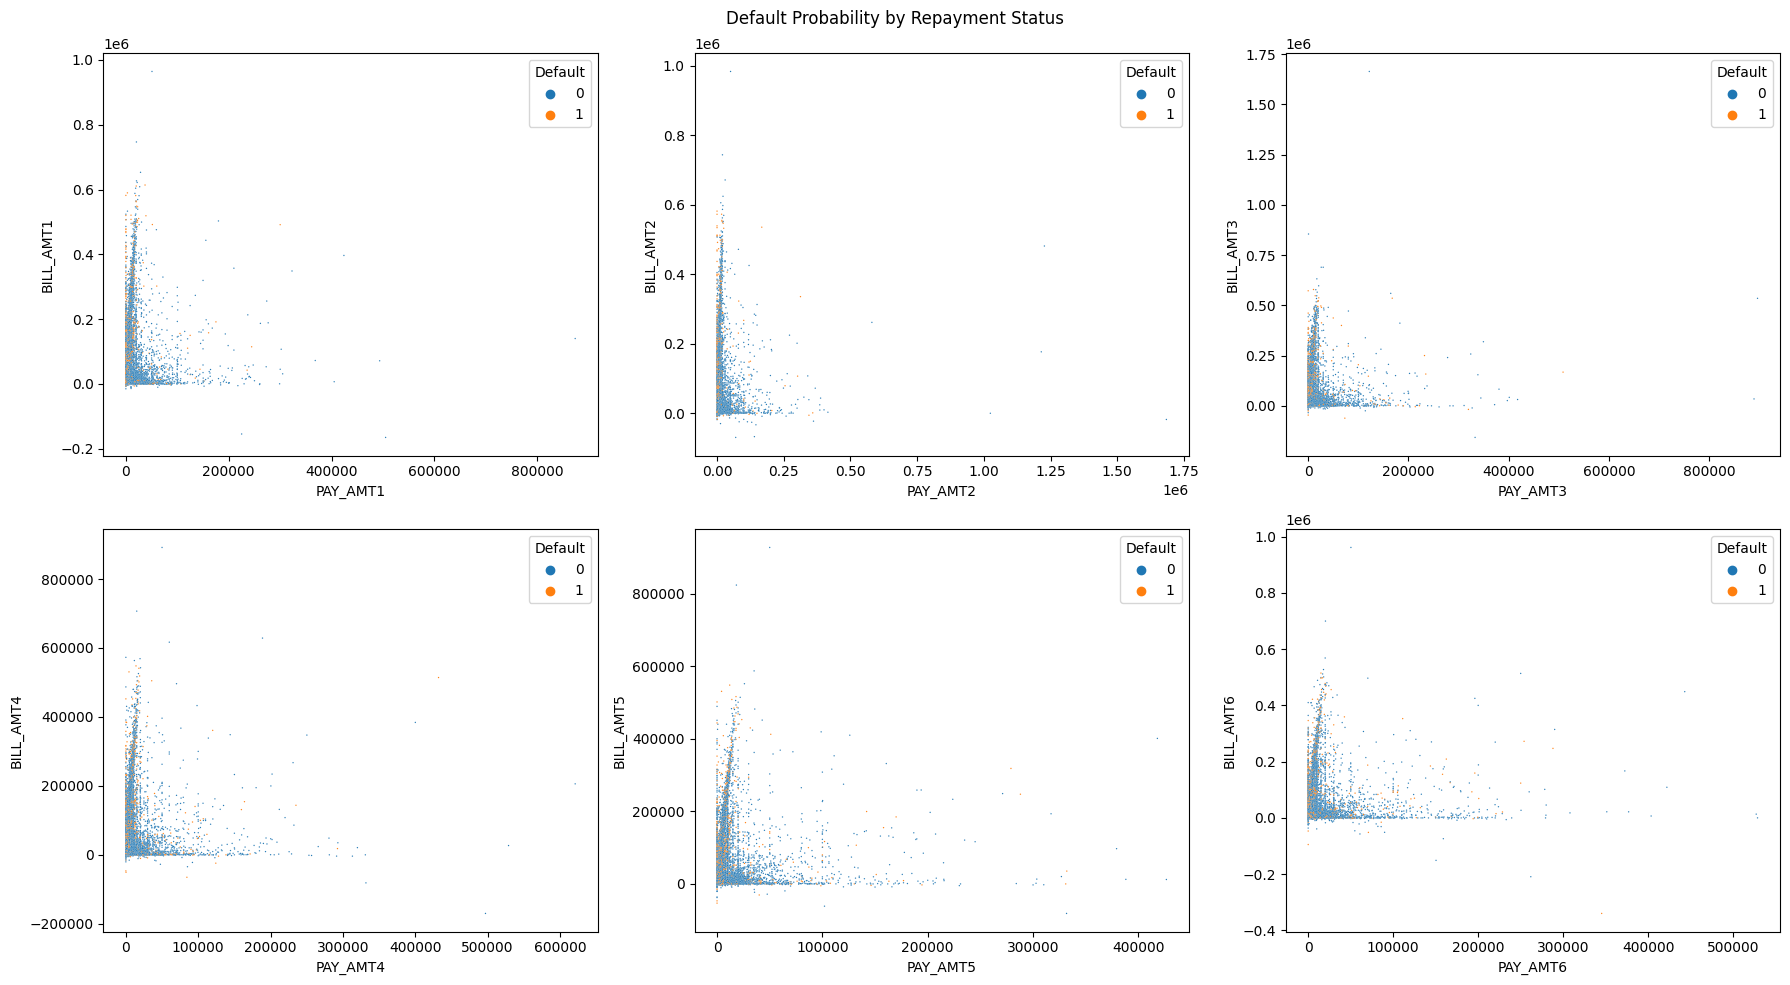

In [305]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Default Probability by Repayment Status')
sns.scatterplot(ax=axes[0, 0],data=data,x='PAY_AMT1', y='BILL_AMT1', hue = 'Default',c='r', s=1)
sns.scatterplot(ax=axes[0, 1],data=data,x='PAY_AMT2', y='BILL_AMT2', hue = 'Default',c='b', s=1)
sns.scatterplot(ax=axes[0, 2],data=data,x='PAY_AMT3', y='BILL_AMT3', hue = 'Default',c='g', s=1)
sns.scatterplot(ax=axes[1, 0],data=data,x='PAY_AMT4', y='BILL_AMT4', hue = 'Default',c='y', s=1)
sns.scatterplot(ax=axes[1, 1],data=data,x='PAY_AMT5', y='BILL_AMT5', hue = 'Default',c='m', s=1)
sns.scatterplot(ax=axes[1, 2],data=data,x='PAY_AMT6', y='BILL_AMT6', hue = 'Default',c='c', s=1)


In [306]:
#no consumption but defaults are 0 and 1
gh=data[(data['BILL_AMT1']==0) & (data['BILL_AMT2']==0)&(data['BILL_AMT3']==0)&(data['BILL_AMT4']==0)&(data['BILL_AMT5']==0)&(data['BILL_AMT6']==0)]
gh


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status1,Repayment_Status2,Repayment_Status3,Repayment_Status4,Repayment_Status5,Repayment_Status6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGE_BIN,LIMIT_BAL_BIN
18,19,360000,Female,Postgrad,Married,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,41-50,300001-400000
19,20,180000,Female,Postgrad,Single,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,21-30,100001-200000
45,46,210000,Male,Postgrad,Single,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1,21-30,200001-300000
79,80,240000,Female,Undergrad,Single,44,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1,41-50,200001-300000
121,122,450000,Male,Postgrad,Married,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1,31-40,400001-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,29909,140000,Male,Postgrad,Single,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1,21-30,100001-200000
29906,29910,360000,Male,Postgrad,Single,32,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,31-40,300001-400000
29970,29974,230000,Male,Undergrad,Married,35,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1,31-40,200001-300000
29976,29980,180000,Male,Postgrad,Married,32,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,31-40,100001-200000


In [307]:
gh['Default'].value_counts()

0    549
1    317
Name: Default, dtype: int64

<AxesSubplot: >

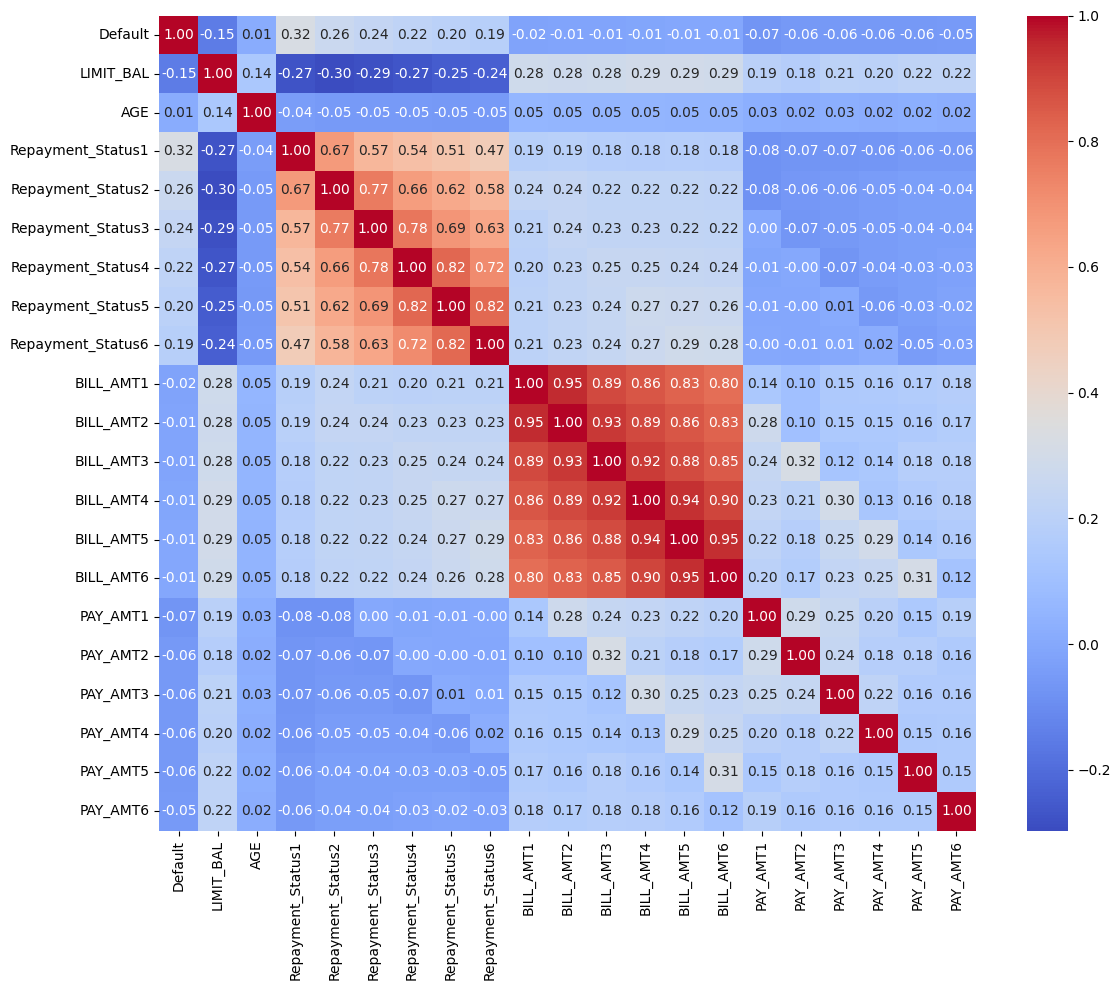

In [308]:
#correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data[['Default','LIMIT_BAL','AGE','Repayment_Status1','Repayment_Status2','Repayment_Status3','Repayment_Status4','Repayment_Status5','Repayment_Status6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


In [309]:
final = data.copy()

In [310]:
final

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status1,Repayment_Status2,Repayment_Status3,Repayment_Status4,Repayment_Status5,Repayment_Status6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGE_BIN,LIMIT_BAL_BIN
0,1,20000,Female,Undergrad,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30,10000-20000
1,2,120000,Female,Undergrad,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30,100001-200000
2,3,90000,Female,Undergrad,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40,80001-100000
3,4,50000,Female,Undergrad,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40,40001-60000
4,5,50000,Male,Undergrad,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60,40001-60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,29996,220000,Male,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,31-40,200001-300000
29993,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,41-50,100001-200000
29994,29998,30000,Male,Undergrad,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,31-40,20001-40000
29995,29999,80000,Male,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,41-50,60001-80000


# Feature Engineering

In [311]:
# Assign ordinals to each age band 

final.loc[final['AGE'] <= 30, 'AGE'] = 0
final.loc[(final['AGE'] > 30) & (final['AGE'] <= 40), 'AGE'] = 1
final.loc[(final['AGE'] > 40) & (final['AGE'] <= 50), 'AGE'] = 2
final.loc[(final['AGE'] > 50) & (final['AGE'] <= 60), 'AGE'] = 3
final.loc[(final['AGE'] > 60) & (final['AGE'] <= 70), 'AGE'] = 4
final.loc[final['AGE'] > 70 , 'AGE'] = 5

In [312]:
# Convert ordinal Age into integer

final['AGE'] = final['AGE'].astype('int')


In [313]:
# Convert Sex into numerical values where 0 = female and 1 = male

final['SEX'] = final['SEX'].map({'Female': 0,'Male': 1})

In [314]:
# Convert Marriage into onehot encoding
final = pd.get_dummies(final, columns = ['MARRIAGE'],prefix = 'Mar')
final = pd.get_dummies(final, columns = ['EDUCATION'], prefix = 'Edu')


In [315]:
# Assign ordinals to each credit limit band 

final.loc[final['LIMIT_BAL'] <= 20000, 'LIMIT_BAL'] = 0
final.loc[(final['LIMIT_BAL'] > 20000) & (final['LIMIT_BAL'] <= 40000), 'LIMIT_BAL'] = 1
final.loc[(final['LIMIT_BAL'] > 40000) & (final['LIMIT_BAL'] <= 60000), 'LIMIT_BAL'] = 2
final.loc[(final['LIMIT_BAL'] > 60000) & (final['LIMIT_BAL'] <= 80000), 'LIMIT_BAL'] = 3
final.loc[(final['LIMIT_BAL'] > 80000) & (final['LIMIT_BAL'] <= 100000), 'LIMIT_BAL'] = 4
final.loc[(final['LIMIT_BAL'] > 100000) & (final['LIMIT_BAL'] <= 200000), 'LIMIT_BAL'] = 5
final.loc[(final['LIMIT_BAL'] > 200000) & (final['LIMIT_BAL'] <= 300000), 'LIMIT_BAL'] = 6
final.loc[(final['LIMIT_BAL'] > 300000) & (final['LIMIT_BAL'] <= 400000), 'LIMIT_BAL'] = 7
final.loc[(final['LIMIT_BAL'] > 400000) & (final['LIMIT_BAL'] <= 500000), 'LIMIT_BAL'] = 8
final.loc[(final['LIMIT_BAL'] > 500000) & (final['LIMIT_BAL'] <= 600000), 'LIMIT_BAL'] = 9
final.loc[(final['LIMIT_BAL'] > 600000) & (final['LIMIT_BAL'] <= 1000000), 'LIMIT_BAL'] = 10
final.loc[final['LIMIT_BAL'] > 1000000 , 'LIMIT_BAL'] = 11

In [394]:
final['ratio'] = final['Bill_AMT1']-final['PAY_AMT1']

KeyError: 'Bill_AMT1'

In [316]:
# Encode Repayment status

final = pd.get_dummies(final, columns = ['Repayment_Status1','Repayment_Status2','Repayment_Status3','Repayment_Status4','Repayment_Status5','Repayment_Status6'],prefix = 'Repay',drop_first = True)


In [317]:
final

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGE_BIN,LIMIT_BAL_BIN,Mar_Married,Mar_Others,Mar_Single,Edu_High School,Edu_Others,Edu_Postgrad,Edu_Undergrad,Repay_-1,Repay_0,Repay_1,Repay_2,Repay_3,Repay_4,Repay_5,Repay_6,Repay_7,Repay_8,Repay_-1,Repay_0,Repay_1,Repay_2,Repay_3,Repay_4,Repay_5,Repay_6,Repay_7,Repay_8,Repay_-1,Repay_0,Repay_1,Repay_2,Repay_3,Repay_4,Repay_5,Repay_6,Repay_7,Repay_8,Repay_-1,Repay_0,Repay_1,Repay_2,Repay_3,Repay_4,Repay_5,Repay_6,Repay_7,Repay_8,Repay_-1,Repay_0,Repay_2,Repay_3,Repay_4,Repay_5,Repay_6,Repay_7,Repay_8,Repay_-1,Repay_0,Repay_2,Repay_3,Repay_4,Repay_5,Repay_6,Repay_7,Repay_8
0,1,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30,10000-20000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,5,0,0,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30,100001-200000,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,4,0,1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40,80001-100000,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2,0,1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40,40001-60000,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,2,1,3,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60,40001-60000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,29996,6,1,1,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,31-40,200001-300000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29993,29997,5,1,2,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,41-50,100001-200000,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29994,29998,1,1,1,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,31-40,20001-40000,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29995,29999,3,1,2,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,41-50,60001-80000,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [318]:
final.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default', 'AGE_BIN',
       'LIMIT_BAL_BIN', 'Mar_Married', 'Mar_Others', 'Mar_Single',
       'Edu_High School', 'Edu_Others', 'Edu_Postgrad', 'Edu_Undergrad',
       'Repay_-1', 'Repay_0', 'Repay_1', 'Repay_2', 'Repay_3', 'Repay_4',
       'Repay_5', 'Repay_6', 'Repay_7', 'Repay_8', 'Repay_-1', 'Repay_0',
       'Repay_1', 'Repay_2', 'Repay_3', 'Repay_4', 'Repay_5', 'Repay_6',
       'Repay_7', 'Repay_8', 'Repay_-1', 'Repay_0', 'Repay_1', 'Repay_2',
       'Repay_3', 'Repay_4', 'Repay_5', 'Repay_6', 'Repay_7', 'Repay_8',
       'Repay_-1', 'Repay_0', 'Repay_1', 'Repay_2', 'Repay_3', 'Repay_4',
       'Repay_5', 'Repay_6', 'Repay_7', 'Repay_8', 'Repay_-1', 'Repay_0',
       'Repay_2', 'Repay_3', 'Repay_4', 'Repay_5', 'Repay_6', 'Repay_7',
       'Repay_8', 'Repay_-1', 'Repay_0', 'Rep

In [319]:
model_data = final.drop(['ID','AGE_BIN','LIMIT_BAL_BIN'],axis=1)


In [320]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29997 entries, 0 to 29996
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        29997 non-null  int64
 1   SEX              29997 non-null  int64
 2   AGE              29997 non-null  int64
 3   BILL_AMT1        29997 non-null  int64
 4   BILL_AMT2        29997 non-null  int64
 5   BILL_AMT3        29997 non-null  int64
 6   BILL_AMT4        29997 non-null  int64
 7   BILL_AMT5        29997 non-null  int64
 8   BILL_AMT6        29997 non-null  int64
 9   PAY_AMT1         29997 non-null  int64
 10  PAY_AMT2         29997 non-null  int64
 11  PAY_AMT3         29997 non-null  int64
 12  PAY_AMT4         29997 non-null  int64
 13  PAY_AMT5         29997 non-null  int64
 14  PAY_AMT6         29997 non-null  int64
 15  Default          29997 non-null  int64
 16  Mar_Married      29997 non-null  uint8
 17  Mar_Others       29997 non-null  uint8
 18  Mar_Si

# 6. Modelling


## 6.1 Split training data

In [321]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [322]:
X = model_data.drop(['Default'],axis=1)
y = model_data['Default']

In [323]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [324]:
#treating imbalance with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)

In [325]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_smote)

In [326]:
y_train = y_train_smote

In [327]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (32704, 80)
y_train shape:  (32704,)
X_test shape:  (9000, 80)


## 6.2 Classification Predictive Modeling


## 6.2.1 Logistic regression

In [328]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

83.71

## 6.2.2 Stochastic gradient descent


In [329]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

83.56

### 6.2.3 Decision tree


In [330]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.46

## 6.2.4 Random forest

In [331]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.46

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

## 6.3.1 Training accuracy

In [332]:
models = pd.DataFrame({'Model': ['Logistic Regression', 
                                 'Random Forest','Stochastic Gradient Decent', 
                                 'Decision Tree'],
                       'Score': [acc_log, acc_random_forest, 
                                 acc_sgd, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,99.46
1,Decision Tree,99.46
2,Logistic Regression,83.71
3,Stochastic Gradient Decent,83.56


## 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [333]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
#classifiers.append(SVC())
#classifiers.append(KNeighborsClassifier(n_neighbors = 5))
#classifiers.append(GaussianNB())
#classifiers.append(Perceptron())
#classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
#classifiers.append(CatBoostClassifier())

len(classifiers)

4

In [346]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 3))

In [347]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [348]:
#cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines','Gausian Naive Bayes', 'KNN','Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})

cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.844336,0.116233,Random Forest
1,0.794649,0.147342,Logistic Regression
2,0.789787,0.127382,Stochastic Gradient Descent
3,0.773518,0.089306,Decision Tree


In [349]:
#As we can see, Random forest has the highest cross validation mean and thus we will proceed with this model.

## 6.3.3 Hyperparameter tuning for Logistic regression

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [384]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=3)
logreg_cv.fit(X_train,y_train)
print("Best parameters: ", logreg_cv.best_params_) 
print("Best estimator: ", logreg_cv.best_estimator_)

#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)


Best parameters:  {'C': 1000.0, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=1000.0)


In [385]:
# Training accuracy

logreg2=LogisticRegression(C=1000,penalty="l2")
logreg2.fit(X_train,y_train)
acc_log = round(logreg2.score(X_train, y_train) * 100, 2)
print("accuracy score:", acc_log)
# Use model's default parameters to get cross validation score
scores = cross_val_score(logreg2, X_train, y_train, scoring ="roc_auc", cv = 3)
roc_auc_lr = np.mean(scores)
print("ROC_AUC:",roc_auc_lr)

accuracy score: 83.73
ROC_AUC: 0.8853312198990246


In [386]:
import joblib
joblib.dump(roc_auc_lr,"logreg_ROC_AUC_CV.pkl") 

['logreg_ROC_AUC_CV.pkl']

In [387]:
lr_best = joblib.load("logreg_ROC_AUC_CV.pkl")
lr_best

0.8853312198990246

In [388]:
optimal_rf_clf = logreg_cv.best_estimator_


In [389]:
# Define a function to compute Precision, Recall and F1 score

def get_pre_rec_f1(model,X_test,y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')

In [390]:
# Calculate precision and recall of Logistic Regression model

print('Logistic Regression model on test data:')
get_pre_rec_f1(logreg2, X_test, y_test)

Logistic Regression model on test data:
Precision:0.245
Recall:0.732
F1 score:0.367


## 6.3.3 Hyperparameter tuning for Random Forest


In [359]:
# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [362]:
joblib.dump(grid_search,"RandomForest_tuned_final.pkl")

['RandomForest_tuned_final.pkl']

In [363]:
grid_search = joblib.load("RandomForest_tuned_final.pkl")


In [372]:
# Use the best parameters to fit the model

rf_best = RandomForestClassifier(**grid_search.best_params_)   
rf_best.fit(X_train,y_train)

scores_best = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 3)
accuracy_best = cross_val_score(rf_best, X_train, y_train, scoring ="accuracy", cv = 3)

roc_auc_best = np.mean(scores_best)
accuracy_score_best = np.mean(accuracy_best)
print(f'ROC_AUC training score after tuning for Random Forest: {roc_auc_best:.3f}')
print("Accuracy score:",accuracy_score_best)

ROC_AUC training score after tuning for Random Forest: 0.921
Accuracy score: 0.8336337472367467


In [366]:
# Compute precision, recall and F1 score of Random Forest model on test data

print('Random Forest model on test data:')
get_pre_rec_f1(rf_best, X_test, y_test)

Random Forest model on test data:
Precision:0.454
Recall:0.527
F1 score:0.488


Text(0.5, 1.0, 'Random Forest')

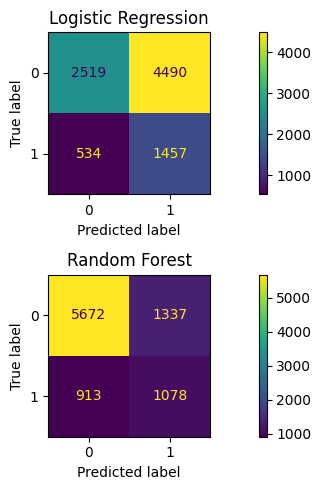

In [391]:
# Plot confusion matrix of 3 models
from sklearn.metrics import plot_confusion_matrix

fig,ax=plt.subplots(2,1, figsize=(10,5))

plot_confusion_matrix(logreg2, X_test, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Logistic Regression")

plot_confusion_matrix(rf_best, X_test, y_test, ax = ax[1], values_format="d")
ax[1].set_title("Random Forest")


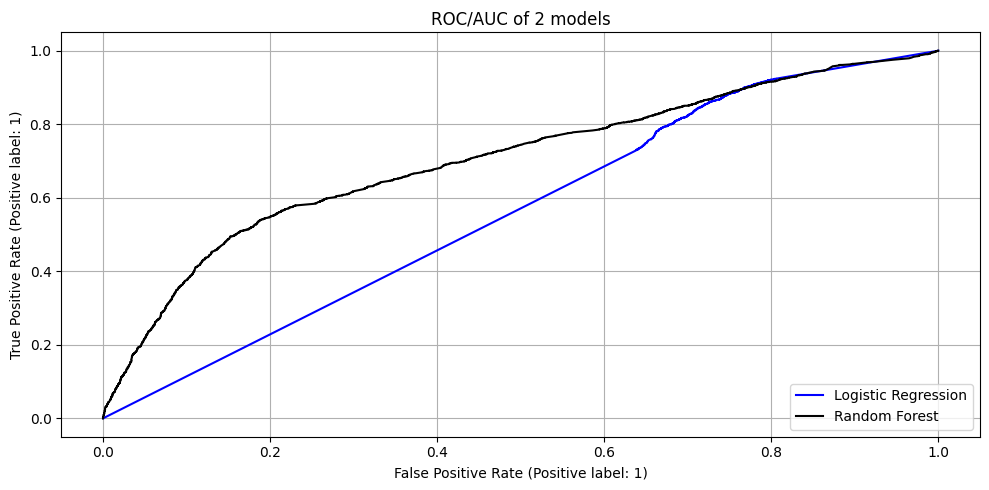

In [392]:
# Plot ROC_AUC curve of 2 models
from sklearn.metrics import plot_roc_curve

fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(logreg2, X_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(rf_best, X_test, y_test,ax=ax, color="black",label='Random Forest')

plt.title('ROC/AUC of 2 models')
plt.grid()

Text(0.5, 1.0, 'Features importance')

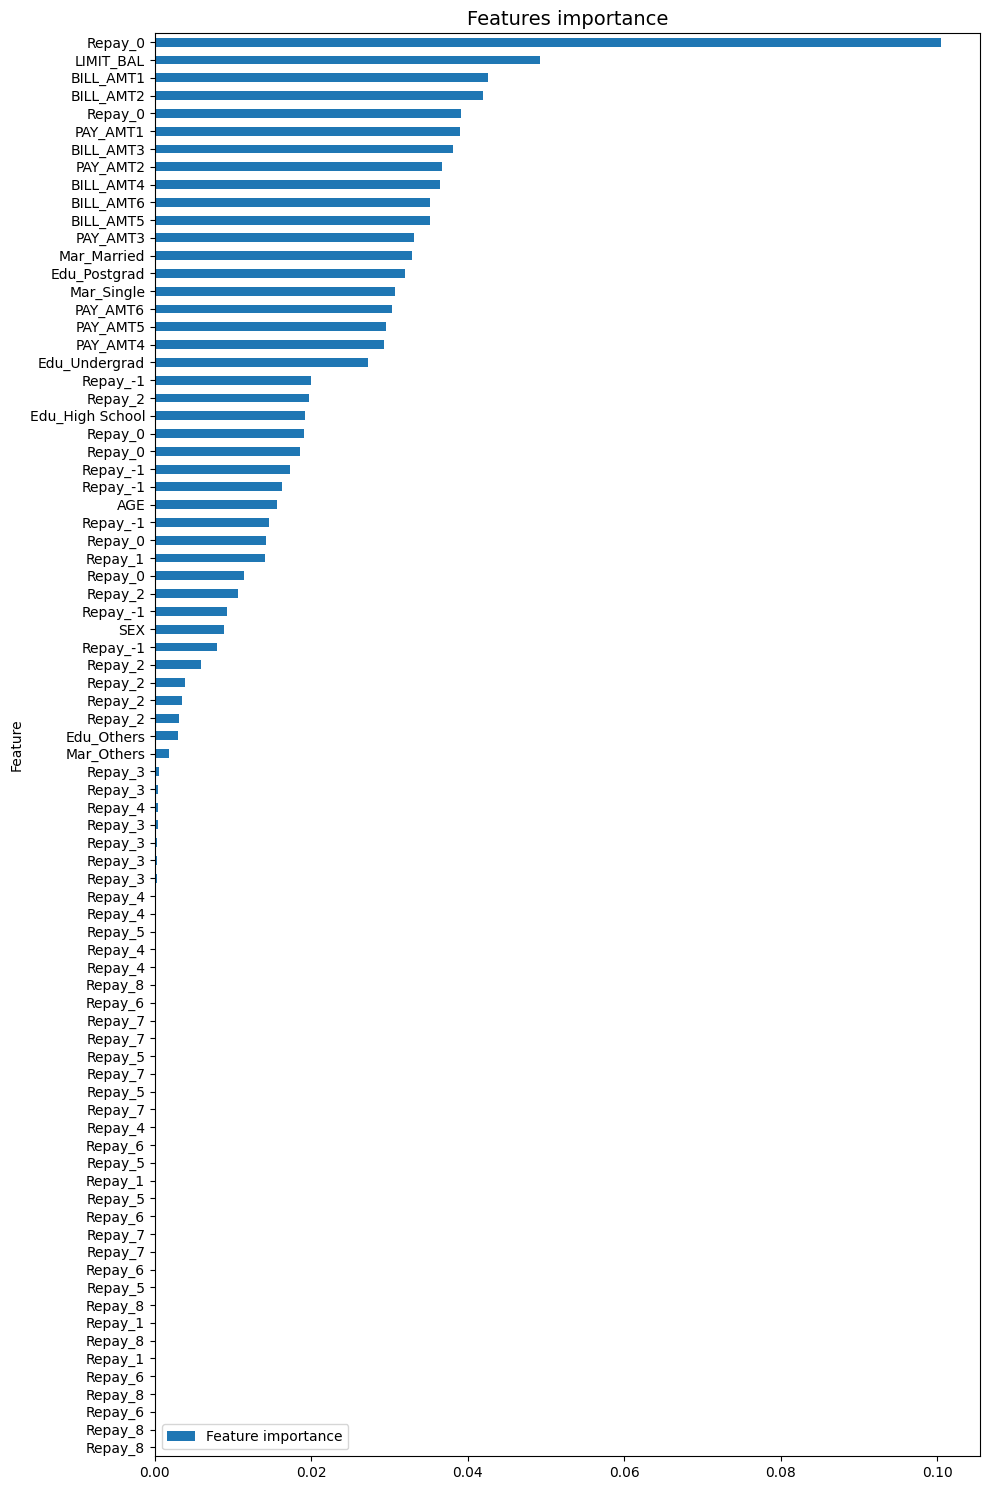

In [393]:
# Plot feature importance of winner model - Random Forest
feature_cols = X.columns.tolist() 
fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': rf_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,15))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)